In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)
data = pd.read_csv('store_data.csv', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


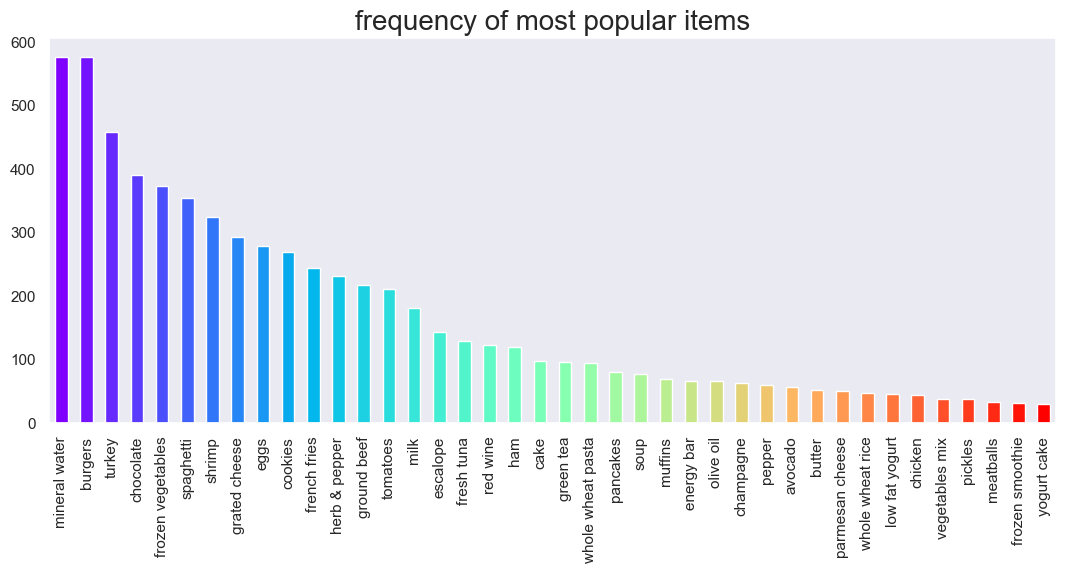

In [5]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
data[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [6]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

In [7]:
import warnings
warnings.filterwarnings('ignore')

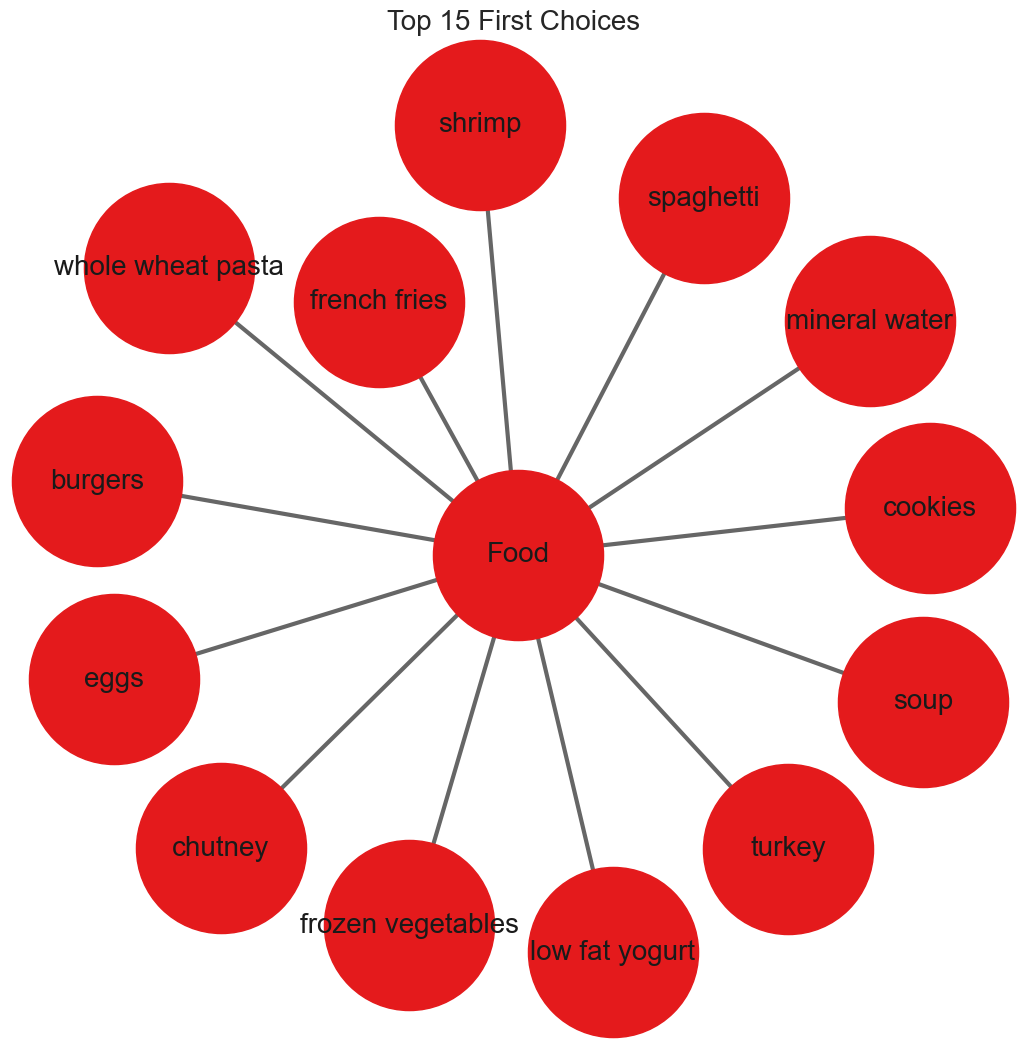

In [8]:
plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [9]:
transactions = []
for i in range(0, len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0, len(data.columns))])
transactions[:1]

from itertools import permutations
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))
print('# of items:',len(items))
print(list(items))
if 'nan' in items: items.remove('nan')
print(list(items))
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of items: 122
['body spray', 'energy bar', 'flax seed', 'ham', 'chocolate bread', 'whole weat flour', 'pet food', 'shampoo', 'shrimp', 'olive oil', 'frozen vegetables', 'salt', 'light cream', 'spaghetti', 'black tea', 'gluten free bar', 'nan', 'rice', 'brownies', 'mint green tea', 'tea', 'pancakes', 'pickles', 'cider', 'frozen smoothie', 'zucchini', 'burger sauce', 'protein bar', 'white wine', 'chutney', 'grated cheese', 'fromage blanc', 'fresh tuna', 'mashed potato', 'dessert wine', 'mineral water', 'whole wheat pasta', 'tomato sauce', 'salad', 'oil', 'barbecue sauce', 'melons', ' asparagus', 'asparagus', 'oatmeal', 'shallot', 'herb & pepper', 'muffins', 'turkey', 'mayonnaise', 'eggplant', 'cottage cheese', 'champagne', 'clothes accessories', 'toothpaste', 'cooking oil', 'pepper', 'green grapes', 'strong cheese', 'burgers', 'Food', 'salmon', 'low fat yogurt', 'cake', 'nonfat milk', 'carrots', 'yogurt cake', 'yams', 'ketchup', 'bramble', 'whole wheat rice', 'french wine', 'spinach', 

In [10]:
from mlxtend.preprocessing import TransactionEncoder

encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)
onehot.head()

,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [11]:
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)
support.head()

,support
Food,1.000000
mineral water,0.238368
eggs,0.179709
spaghetti,0.174110
french fries,0.170911


In [12]:
support.describe()

,support
count,121.000000
mean,0.040611
std,0.097542
min,0.000133
25%,0.007732
50%,0.015731
75%,0.042528
max,1.000000


In [13]:
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()
supportBM = np.logical_and(onehot['burgers'], onehot['mineral water']).mean()
supportFM = np.logical_and(onehot['french fries'], onehot['mineral water']).mean()

print("burgers and french fries: %.2f" % supportBF)
print("burgers and mineral water: %.2f" % supportBM)
print("french fries and mineral water: %.2f" % supportFM)

burgers and french fries: 0.02
burgers and mineral water: 0.02
french fries and mineral water: 0.03


In [14]:
onehot['mineral water+french fries'] = np.logical_and(onehot['mineral water'], onehot['french fries'])
support = onehot.mean()
val = support.loc['mineral water+french fries']
print(f'mineral water+french fries support = {val}')

mineral water+french fries support = 0.03372883615517931


In [15]:
supportMF = np.logical_and(onehot['mineral water'], onehot['french fries']).mean()
supportM = onehot['mineral water'].mean()
supportF = onehot['french fries'].mean()

confidenceMM = supportMF / supportM
confidenceMF = supportMF / supportF
print('mineral water = {0:.2f}, french fries = {1:.2f}'.format(confidenceMM, confidenceMF))

mineral water = 0.14, french fries = 0.20


In [16]:
lift = supportMF / (supportM * supportF)
print("Lift: %.2f" % lift)

Lift: 0.83


In [17]:
supportBF = np.logical_and(onehot['burgers'], onehot['french fries']).mean()
supportB = onehot['burgers'].mean()
supportnF = 1.0 - onehot['french fries'].mean()
supportBnF = supportB - supportBF
conviction = supportB * supportnF / supportBnF
print("Conviction: %.2f" % conviction)

Conviction: 1.11
